<a href="https://colab.research.google.com/github/els285/Aachen_Intro2NN/blob/main/Exercises/2_Regression_Penguins_SKlearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Regression

Goals:
* Look at a 1D linear regression with scikit-learn
* Extend to linear regression with several inputs
* Apply to logistic regression

Outcomes:
* Understanding of regression problems, associated loss function and metrics for performance evalulation
* Practice with dataset manipulation
* Practice with `sklearn` and `pytorch`


![](https://github.com/els285/Aachen_Intro2NN/blob/main/images/penguins-on-adam-scales.jpg?raw=1)

# Simple Linear Regression with sklearn

## Data loading and preprocessing

Loading the necessary modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!wget -O penguins_downloaded.csv "https://cernbox.cern.ch/s/wh34GhKCOv0Umh7/download"
print("Download complete")

--2025-05-05 17:42:21--  https://cernbox.cern.ch/s/wh34GhKCOv0Umh7/download
Resolving cernbox.cern.ch (cernbox.cern.ch)... 137.138.120.151, 128.142.53.35, 128.142.53.28, ...
Connecting to cernbox.cern.ch (cernbox.cern.ch)|137.138.120.151|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘penguins_downloaded.csv’

penguins_downloaded     [  <=>               ]  14.88K  71.6KB/s    in 0.2s    

2025-05-05 17:42:22 (71.6 KB/s) - ‘penguins_downloaded.csv’ saved [15241]

Download complete


Load the penguin dataset (a CSV file) using the `pandas` module

In [ ]:
input_penguins_df = pd.read_csv("penguins_downloaded.csv")

Some data pre-processing:since some of the entries don't exist in the dataset, we drop them using the following line.

In [ ]:
penguins_df = input_penguins_df.dropna(inplace=False)

We will start by extracting only two fields, and using one as an input to regress the other: simple linear regression

In [ ]:
input_features = penguins_df["flipper_length_mm"].values
target         = penguins_df["body_mass_g"].values

It's useful to get a feel for the data by plotting it. The following scatterplot indicates that the data will be modelled reasonably well by a linear fit i.e. linear regression is an appropriate tool

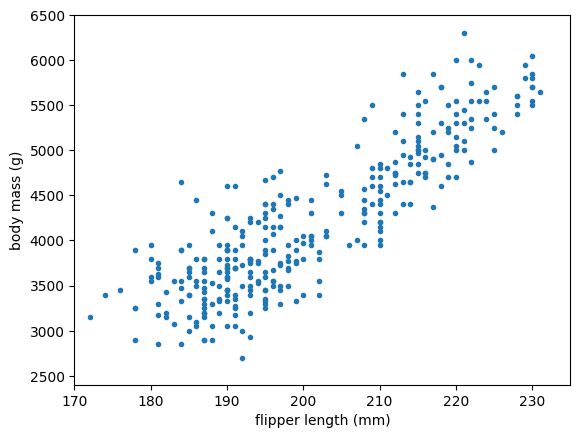

In [ ]:
fig, ax = plt.subplots()

def plot_regression_problem(ax, xlow=170, xhigh=235, ylow=2400, yhigh=6500):
    ax.scatter(input_features, target, marker=".")
    ax.set_xlim(xlow, xhigh)
    ax.set_ylim(ylow, yhigh)
    ax.set_xlabel("flipper length (mm)")
    ax.set_ylabel("body mass (g)")

plot_regression_problem(ax)

plt.show()

## Linear Regression Model

We begin by using the `LinearRegression` model from `scikit-learn`

This method applies the ordinary least squares solution, minimising the squared error between the data and the predictions analytically.

In [ ]:
from sklearn.linear_model import LinearRegression

The `LinearRegression` model expects our input data to be of shape $\text{data} \times \text{features}$. So we need to re-shape `input_features` into what is effectively a column vector. We also rename it `X` as is a standard ML convention (but feel free to have more verbose names if you prefer).

\We'll call the `target` array `y_true`

In [ ]:
X = input_features.reshape(-1,1)
y_true = target

Defining the model and then doing the fit is a simple two-line procedure!

In [ ]:
model = LinearRegression()
model.fit(X, y_true)

## Evaluating the model

The fitted model can now be used to make predictions on our input data. We use the `.predict` functionality of our model to estimate the mass for a given flipper length.

In [ ]:
example_flipper_length = np.asarray([300])  # Example flipper length in mm, as torch.tensor
example_body_mass = model.predict([example_flipper_length])
print(example_body_mass)

The same syntax applies to all the input data:

In [ ]:
y_pred = model.predict(X)

In [ ]:
# Plot the original data and the linear regression line
plt.scatter(X, y_true, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', label='Linear Regression Line')
plt.xlabel('Input')
plt.ylabel('Target')
plt.title('Linear Regression Example')
plt.legend()
plt.show()

# Print out the model parameters (slope and intercept)
print(f"Slope (coefficient): {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

Finally, it's important to find a metric to quantify the "goodness of fit". Many metrics are available; there's no one best choice...

Scikit-learn by default uses something called the *coefficient of determination* which is 0 for a useless model and 1 for a perfect fit

In [ ]:
# Note that this is evaluated on the targets, not the predictions
r_squared = model.score(X, y_true)
print(f"R-squared: {r_squared}")

# Multiple Linear Regression Task

Extend this to multiple linear regression by passing a multi-dimensional array of input_features into a new model.
See if you can improve the R-squared score

In [ ]:
# Split data into inputs (X) and target (y)
features_to_consider = ["flipper_length_mm" , "bill_depth_mm"]

X = penguins_df[features_to_consider].values  # Inputs: first and second columns
y_true = penguins_df["body_mass_g"].values   # Target: third column

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y_true)

# Use the model to make predictions
y_pred = model.predict(X)

# Plot the data and the predicted values (for visualization, we can only plot 2D projections)
# Since we have 2 input features, we can show a projection of the data in a 3D space or a pair of 2D plots.

# Print out the model parameters (coefficients and intercept)
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

print(f"R-squared: {model.score(X, y_true)}")



# Bonus: Linear regression regresses non-linear functions

I mentioned in the slides that linear regression refers to the relationship between the predictions (outputs) and the parameters, not the independent variables (inputs).

This fact may be obscured because in the penguins dataset, there is also a linear relationship between the inputs and outputs. To prove that you can use linear regression on non-linear functions, provided the outputs are linear in the parameters, take a look at the following example.

We generate some pseduo-data based on some polynomial function. I have chosen a quartic polynomial.

This quartic polynomial is obviously not linear in `x`, but it is linear in the parameters (i.e. the coefficients of each term), so we can use linear regression still, by defining each power of `x` as different variables and recasting the problem as multilinear regression!

In [ ]:
np.random.seed(0)
# Generate some synthetic data
x = np.linspace(-2, 3, 1000).reshape(-1, 1)
y_true = 2*x**4 - 3*x**3 - 10*x**2 + 0.5*x + 3

# Adding some noise to the true values
y = y_true + 0.2 * np.random.randn(*y_true.shape)

Some scikit-learn magic to build all the polynomial terms,  recasting for multilinear regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=4, include_bias=False)
X_poly = poly.fit_transform(x)  # x, x^2, x^3

Fit, predict and visualise as before!

In [ ]:
# 3. Fit linear regression on polynomial features
model = LinearRegression()
model.fit(X_poly, y)

# 4. Predict
y_pred = model.predict(X_poly)

# 5. Plot results
plt.scatter(x, y, label="Noisy data")
plt.plot(x, y_true, label="True curve", color="green", linewidth=5)
plt.plot(x, y_pred, label="Fitted curve", color="red")
plt.legend()
plt.show()
